# CPSC 330 - Applied Machine Learning 

## Homework 4: Logistic regression, hyperparameter optimization 
### Associated lectures: [Lectures 7, 8](https://github.com/UBC-CS/cpsc330-2022W2) 

**Due date: Feb 10, 11:59pm**


## Imports 

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams["font.size"] = 16

from sklearn.dummy import DummyClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import (
    GridSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.tree import DecisionTreeClassifier

## Instructions 
<hr>
rubric={points:6}

Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2022W2/blob/main/docs/homework_instructions.md). 

**You may work with a partner on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 2. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- **Be kind** and respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).

_Note: The assignments will get gradually more open-ended as we progress through the course. In many cases, there won't be a single correct solution. Sometimes you will have to make your own choices and your own decisions (for example, on what parameter values to use when they are not explicitly provided in the instructions). Use your own judgment in such cases and justify your choices, if necessary._

<br><br><br><br>

## Exercise 1: Implementing `DummyClassifier` 
<hr>
rubric={points:25}

In this course (unlike CPSC 340) you will generally **not** be asked to implement machine learning algorihtms (like logistic regression) from scratch. However, this exercise is an exception: you will implement the simplest possible classifier, `DummyClassifier`.

As a reminder, `DummyClassifier` is meant as a baseline and is generally the worst possible "model" you could "fit" to a dataset. All it does is predict the most popular class in the training set. So if there are more 0s than 1s it predicts 0 every time, and if there are more 1s than 0s it predicts 1 every time. For `predict_proba` it looks at the frequencies in the training set, so if you have 30% 0's 70% 1's it predicts `[0.3 0.7]` every time. Thus, `fit` only looks at `y` (not `X`).

Below you will find starter code for a class called `MyDummyClassifier`, which has methods `fit()`, `predict()`, `predict_proba()` and `score()`. Your task is to fill in those four functions. To get your started, I have given you a `return` statement in each case that returns the correct data type: 
- `fit` can return nothing, 
- `predict` returns an array whose size is the number of examples, 
- `predict_proba` returns an array whose size is the number of examples x 2, and 
- `score` returns a number.

The next code block has some tests you can use to assess whether your code is working. 

I suggest starting with `fit` and `predict`, and making sure those are working before moving on to `predict_proba`. For `predict_proba`, you should return the frequency of each class in the training data, which is the behaviour of `DummyClassifier(strategy='prior')`. Your `score` function should call your `predict` function. Again, you can compare with `DummyClassifier` using the code below.

To simplify this question, you can assume **binary classification**, and furthermore that these classes are **encoded as 0 and 1**. In other words, you can assume that `y` contains only 0s and 1s. The real `DummyClassifier` works when you have more than two classes, and also works if the target values are encoded differently, for example as "cat", "dog", "mouse", etc.

In [4]:
count_y0 = 0
count_y1 = 0
class MyDummyClassifier:
    """
    A baseline classifier that predicts the most common class.
    The predicted probabilities come from the relative frequencies
    of the classes in the training data.

    This implementation only works when y only contains 0s and 1s.
    """
    def fit(self, X, y):
        y0 = 0
        y1 = 0
        for i in y:
            if (i == 0):
                y0 = y0 +1
            else:
                y1 = y1 +1
        global count_y0, count_y1
        count_y0 = y0
        count_y1 = y1
        return None
    
    def predict(self, X):
        if(count_y0 > count_y1):
            return np.zeros(X.shape[0]) 
        else:
            return np.full(fill_value = 1, shape = (X.shape[0]))  ##rows instead of columns
    
    def predict_proba(self, X):
        sum = count_y0 + count_y1
        prob_zero = count_y0/sum
        prob_one  = count_y1/sum
        return np.full(shape = (X.shape[0],2), fill_value = [prob_zero, prob_one])  # Replace with your code

    def score(self, X, y):
        predicted_values = MyDummyClassifier.predict(self,X)
        compare = predicted_values == y
        correct = predicted_values[compare]
        score = len(correct)/len(y)
        return score

Below are some tests for `predict` using randomly generated data. You may want to run the cell a few times to make sure you explore the different cases (or automate this with a loop or random seeds).

In [5]:
# For testing, generate random data
n_train = 101
n_valid = 21
d = 5
X_train_dummy = np.random.randn(n_train, d)
X_valid_dummy = np.random.randn(n_valid, d)
y_train_dummy = np.random.randint(2, size=n_train)
y_valid_dummy = np.random.randint(2, size=n_valid)

my_dc = MyDummyClassifier()
sk_dc = DummyClassifier(strategy="prior")

my_dc.fit(X_train_dummy, y_train_dummy)
sk_dc.fit(X_train_dummy, y_train_dummy)

assert np.array_equal(my_dc.predict(X_train_dummy), sk_dc.predict(X_train_dummy))
assert np.array_equal(my_dc.predict(X_valid_dummy), sk_dc.predict(X_valid_dummy))

Below are some tests for `predict_proba`.

In [6]:
assert np.allclose(
    my_dc.predict_proba(X_train_dummy), sk_dc.predict_proba(X_train_dummy)
)
assert np.allclose(
    my_dc.predict_proba(X_valid_dummy), sk_dc.predict_proba(X_valid_dummy)
)

Below are some tests for `score`.

In [7]:
assert np.isclose(
    my_dc.score(X_train_dummy, y_train_dummy), sk_dc.score(X_train_dummy, y_train_dummy)
)
assert np.isclose(
    my_dc.score(X_valid_dummy, y_valid_dummy), sk_dc.score(X_valid_dummy, y_valid_dummy)
)

<br><br><br><br>

## Exercise 2: Trump Tweets
<hr>

For the rest of this assignment we'll be looking at a [dataset of Donald Trump's tweets](https://www.kaggle.com/austinreese/trump-tweets) as of June 2020. You should start by downloading the dataset. Unzip it and move the file `realdonaldtrump.csv` into this directory. As usual, please do not submit the dataset when you submit the assignment. 

In [9]:
tweets_df = pd.read_csv("realdonaldtrump.csv", index_col=0)
tweets_df.head()

,link,content,date,retweets,favorites,mentions,hashtags
id,,,,,,,
1698308935,https://twitter.com/realDonaldTrump/status/169...,Be sure to tune in and watch Donald Trump on L...,2009-05-04 13:54:25,510,917,NaN,NaN
1701461182,https://twitter.com/realDonaldTrump/status/170...,Donald Trump will be appearing on The View tom...,2009-05-04 20:00:10,34,267,NaN,NaN
1737479987,https://twitter.com/realDonaldTrump/status/173...,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 08:38:08,13,19,NaN,NaN
1741160716,https://twitter.com/realDonaldTrump/status/174...,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 15:40:15,11,26,NaN,NaN
1773561338,https://twitter.com/realDonaldTrump/status/177...,"""My persona will never be that of a wallflower...",2009-05-12 09:07:28,1375,1945,NaN,NaN


In [10]:
tweets_df.shape

(43352, 7)

We will be trying to predict whether a tweet will go "viral", defined as having more than 10,000 retweets:

In [11]:
y = tweets_df["retweets"] > 10_000

To make predictions, we'll be using only the content (text) of the tweet. 

In [12]:
X = tweets_df["content"]

For the purpose of this assignment, you can ignore all the other columns in the original dataset.

#### 2(a) ordering the steps
rubric={points:8}

Let's start by building a model using `CountVectorizer` and `LogisticRegression`. The code required to do this has been provided below, but in the wrong order. 

- Rearrange the lines of code to correctly fit the model and compute the cross-validation score. 
- Add a short comment to each block to describe what the code is doing.

In [13]:
# Splitting the dataset into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=111)

# Calls count vectorizor to count the words in the tweets and vectorize them
countvec = CountVectorizer(stop_words="english")

# Calls logistic regression as our decision model
lr = LogisticRegression(max_iter=1000)

# Makes the pipeline with the count vectorizor and the logistic regression model
pipe = make_pipeline(countvec, lr)

# Runs cross validation
cross_val_results = pd.DataFrame(
    cross_validate(pipe, X_train, y_train, return_train_score=True)
)

# Gives a mean of the cross validation results
cross_val_results.mean()


fit_time       1.114804
score_time     0.079891
test_score     0.898444
train_score    0.967952
dtype: float64

<br><br>

#### 2(b) Cross-validation fold sub-scores
rubric={points:3}

Above we averaged the scores from the 5 folds of cross-validation. 

- Print out the 5 individual scores. 
    - (Reminder: `sklearn` calls them `"test_score"` but they are really (cross-)validation scores.)
- Are the 5 scores close to each other or spread far apart? 
  - (This is a bit subjective, answer to the best of your ability.)
- How does the size of this dataset (number of rows) compare to the cities dataset we have been using in class? How does this relate to the different sub-scores from the 5 folds?

In [14]:
cross_val_results

,fit_time,score_time,test_score,train_score
0,1.061171,0.080094,0.895587,0.966976
1,1.111861,0.079655,0.898047,0.968206
2,1.156203,0.080536,0.896817,0.967975
3,1.171937,0.079666,0.897893,0.968667
4,1.072847,0.079507,0.903876,0.967938


The 5 scores are close to each other as the max difference between all the test scores is ~1% as an upper bound while for the train score, it only differs by 0.2% maximum which is not a lot in our opinion.  

The cities dataset that we have been using in class only has 209 rows while this dataset has 43352 rows. This dataset is a lot larger than the cities dataset. The different sub-scores from the 5 folds in this dataset does not vary as much as it did in the cities dataset where the discrepancy could be up to ~30% for the test scores and ~6% for the train scores. This most likely means that a larger dataset would result in a decrease in variation between the different sub-scores of the folds.  

<br><br>

#### 2(c) baseline
rubric={points:3}

By the way, are these scores any good? 

- Run `DummyClassifier` (or `MyDummyClassifier`!) on this dataset.
- Compare the `DummyClassifier` score to what you got from logistic regression above. Does logistic regression seem to be doing anything useful?
- Is it necessary to use `CountVectorizer` here? Briefly explain.

In [18]:
dummy = DummyClassifier()
scores = cross_validate(dummy, X_train, y_train, return_train_score = True)
print("Train accuracy:   %0.3f" % np.mean(scores["train_score"]))
print("Validation accuracy:   %0.3f" % np.mean(scores["test_score"]))

Train accuracy:   0.735
Validation accuracy:   0.735


The accuracy score for validation set we got for logistic regression is ~0.9 where as the validation accuracy score we got for dummy classifier is ~0.735. Since the validation accuracy score for logistic regression is much higher that than for dummy classifier we can say that logistic regression seems to be doing something useful.

We do not need CountVectorizer because the Dummy Classifier only looks at y_train.

<br><br>

#### 2(d) probability scores
rubric={points:5}

Here we train a logistic regression classifier on the entire training set: 

(Note: this is relying on the `pipe` variable from 2(a) - you'll need to redefine it if you overwrote that variable in between.)

In [10]:
pipe.fit(X_train, y_train);

Using this model, find the tweet in the **test set** with the highest predicted probability of being viral. Print out the tweet and the associated probability score.

Reminder: you are free to reuse/adapt code from lecture. Please add in a small attribution, e.g. "From Lecture 7".

In [11]:
#Adapted from lecture 7
data_dict = {
    "y": y_test.iloc[0:],
    "y_hat": pipe.predict(X_test.iloc[:].to_numpy()).tolist(),
    "probabilities": pipe.predict_proba(X_test.iloc[:].to_numpy()).tolist(),
    "tweet": X_test.iloc[1:]
}

prob_test = pd.DataFrame(data_dict)
prob_test

,y,y_hat,probabilities,tweet
id,,,,
1773561338,False,False,"[0.9889897167949624, 0.011010283205037628]","""My persona will never be that of a wallflower..."
1894284587,False,False,"[0.9981059317298244, 0.0018940682701756222]",Did you know Donald Trump is on Facebook? http...
2317112756,False,True,"[0.13160288159898226, 0.8683971184010177]",Donald Trump’s commercial-free WWE Raw does bi...
2614325575,False,False,"[0.6350212956071928, 0.3649787043928072]","""Be aware of things that seem inexplicable bec..."
3246382217,False,False,"[0.999657364136026, 0.0003426358639740002]","""Think. That’s the first step. Use all your po..."
...,...,...,...,...
1272737867576590336,True,True,"[0.001813310553582359, 0.9981866894464176]",So true!https://twitter.com/realDonaldTrump/st...
1272871304572678144,True,False,"[0.9976312433884463, 0.002368756611553638]",Wow! May retail sales show biggest one-month i...
1272972387034771456,True,False,"[0.9995283780141827, 0.0004716219858172812]",pic.twitter.com/Xdf1LYKu2i


In [12]:
#Left is probability that the tweet won't go viral and right is that it will
sorted_prob_test = prob_test.sort_values(by="probabilities", ascending=True)
highest_tweet = sorted_prob_test[["tweet"]].iloc[0]

highest_tweet

tweet    Looking forward to the Florida rally tomorrow....
Name: 832742165436579840, dtype: object

In [13]:
sorted_prob_test[["probabilities"]].iloc[0]

probabilities    [3.0651546967241927e-07, 0.9999996934845303]
Name: 832742165436579840, dtype: object

<br><br>

#### 2(e) coefficients
rubric={points:4}

We can extract the `CountVectorizer` and `LogisticRegression` objects from the `make_pipeline` object as follows:


In [14]:
vec_from_pipe = pipe.named_steps["countvectorizer"]
lr_from_pipe = pipe.named_steps["logisticregression"]

Using these extracted components above, display
- the 5 words with the highest coefficients and 
- the 5 words with the smallest coefficients.

In [15]:
#Adapted from lecture 7
feature_names = np.array(vec_from_pipe.get_feature_names_out())
coeffs = lr_from_pipe.coef_.flatten()
word_coeff_df = pd.DataFrame(coeffs, index=feature_names, columns=["Coefficient"])
word_coeff_df.sort_values(by="Coefficient", ascending=False)


,Coefficient
obamagate,2.853988
harassment,2.725251
coronavirus,2.529216
mini,2.527100
fake,2.483955
...,...
celebapprentice,-2.106301
donaldtrump,-2.184576
barackobama,-2.530400
trump2016pic,-2.666748


<br><br>

#### 2(f) Running a cross-validation fold without sklearn tools 
rubric={points:8}

Sklearn provides a lot of useful tools like `make_pipeline` and `cross_validate`, which are awesome. But with these fancy tools it's also easy to lose track of what is actually happening under the hood. 

**Your tasks:**

1. Compute logistic regression's validation score on the first fold, that is, train on 80% and validate on 20% of the training data (`X_train`) without using sklearn `Pipeline` or `cross_validate` or `cross_val_score`. Store the score of the fold in a variable called `fold_score`. Recall that `cross_validation` in `sklearn` does not shuffle the data by default.    

You should start with the following `CountVectorizer` and `LogisticRegression` objects, as well as `X_train` and `y_train` (which you should further split with `train_test_split` and `shuffle=False`):

In [16]:
countvec = CountVectorizer(stop_words="english")
lr = LogisticRegression(max_iter=1000)

In [17]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train, y_train, shuffle=False, test_size=0.2)
               
X_train_count = countvec.fit_transform(X_train2) 
X_test_count = countvec.transform(X_test2)

X_train_lr = lr.fit(X_train_count, y_train2) 

y_test2_pred = lr.predict(X_test_count)

correct = y_test2[y_test2 == y_test2_pred]
fold_score = len(correct)/len(y_test2)
print(fold_score)

0.9038905120713517


## Exercise 3: hyperparameter optimization
<hr>

#### 3(a)
rubric={points:4}

The following code varies the `max_features` hyperparameter of `CountVectorizer` and makes a plot (with the x-axis on a log scale) that shows train/cross-validation scores vs. `max_features`. It also prints the results. 

Based on the plot/output, what value of `max_features` seems best? Briefly explain.

> **Note:** the code may take a minute or two to run. You can uncomment the `print` statement if you want to see it show the progress.

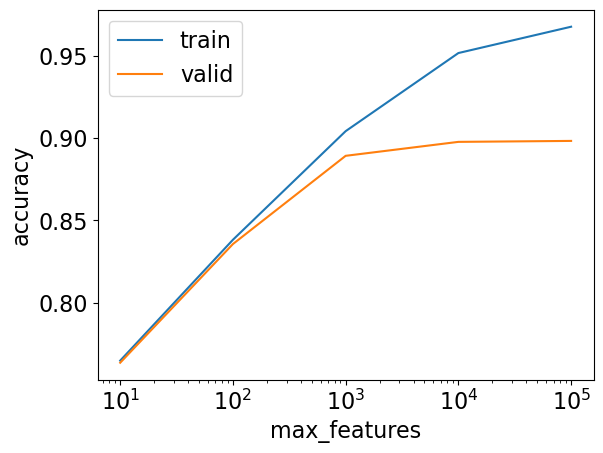

In [18]:
train_scores = []
cv_scores = []

max_features = [10, 100, 1000, 10_000, 100_000]

for mf in max_features:
    #     print(mf)
    pipe = make_pipeline(
        CountVectorizer(stop_words="english", max_features=mf),
        LogisticRegression(max_iter=1000),
    )
    cv_results = cross_validate(pipe, X_train, y_train, return_train_score=True)
    train_scores.append(cv_results["train_score"].mean())
    cv_scores.append(cv_results["test_score"].mean())

plt.semilogx(max_features, train_scores, label="train")
plt.semilogx(max_features, cv_scores, label="valid")
plt.legend()
plt.xlabel("max_features")
plt.ylabel("accuracy");

In [19]:
pd.DataFrame({"max_features": max_features, "train": train_scores, "cv": cv_scores})

,max_features,train,cv
0,10,0.764701,0.763425
1,100,0.838270,0.835671
2,1000,0.904380,0.889371
3,10000,0.951928,0.897860
4,100000,0.967952,0.898444


Although the train and cross validation accuracy are higher as the value of `max_features` increases, we can clearly see that the model is overfitting due to the discrepancy between the train accuracy and the cross validation accuracy. A `max_features` of 100 seems to be the best based on the plot as the training accuracy and cross validation accuracy score are both similar. Therefore, the training score is a good representation of the test score  for other datasets. 100 as the `max_features` value means that the model would most likely be able to generalize well to new datasets. 

<br><br>

#### 3(b)
rubric={points:6}

The following code varies the `C` hyperparameter of `LogisticRegression` and makes a plot (with the x-axis on a log scale) that shows train/cross-validation scores vs. `C`. 

Based on the plot, what value of `C` seems best?

> **Note:** the code may take a minute or two to run. You can uncomment the `print` statement if you want to see it show the progress.

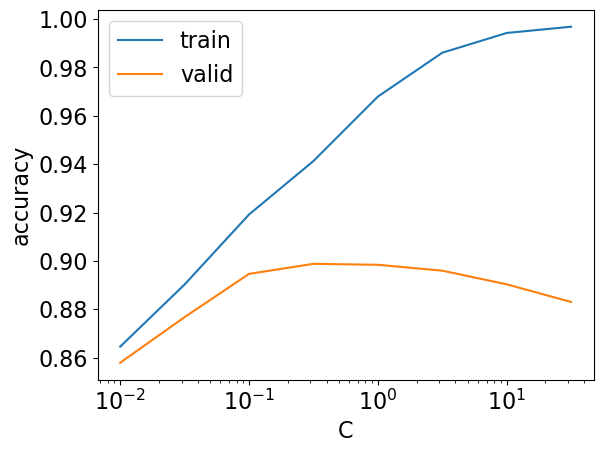

In [20]:
train_scores = []
cv_scores = []

C_vals = 10.0 ** np.arange(-2, 2, 0.5)

for C in C_vals:
    #     print(C)
    pipe = make_pipeline(
        CountVectorizer(stop_words="english", max_features=None),
        LogisticRegression(max_iter=1000, C=C),
    )
    cv_results = cross_validate(pipe, X_train, y_train, return_train_score=True)

    train_scores.append(cv_results["train_score"].mean())
    cv_scores.append(cv_results["test_score"].mean())

plt.semilogx(C_vals, train_scores, label="train")
plt.semilogx(C_vals, cv_scores, label="valid")
plt.legend()
plt.xlabel("C")
plt.ylabel("accuracy");

In [21]:
pd.DataFrame({"C": C_vals, "train": train_scores, "cv": cv_scores})

,C,train,cv
0,0.010000,0.864612,0.857969
1,0.031623,0.890316,0.876822
2,0.100000,0.919227,0.894692
3,0.316228,0.941333,0.898844
4,1.000000,0.967952,0.898444
5,3.162278,0.986091,0.896014
6,10.000000,0.994256,0.890386
7,31.622777,0.996840,0.883066


The best `C` from the plot is 0.1. Values of `C` higher than 0.1 results in a model that is overfitting due to the large gaps between the training accuracy and the cross validation accuracy whereas when `C` is equal to 0.1 it gives the highes cross validation accuracy with a smaller gap between the training accuracy and cross validation accuracy which indicates good generalization.

<br><br>

#### 3(c) Hyperparameter optimization 
rubric={points:10}

Start with the pipeline `pipe` below.

**Your tasks:**
- Create a `GridSearchCV` object named `grid_search` to jointly optimize `max_features` of `CountVectorizer` and `C` of `LogisticRegression` across all the combinations of values we tried above. 
- What are the best values of `max_features` and `C` according to your grid search? 
- Store them in variables `best_max_features` and `best_C`, respectively.  
- Store the best score returned by the grid search in a variable called `best_score`. 

> The code might be a bit slow here. Setting `n_jobs=-1` should speed it up if you have a multi-core processor.

In [23]:
#Adapted from lecture 8
param_grid = {
    "countvectorizer__max_features": max_features,
    "logisticregression__C": C_vals,
}

grid_search = GridSearchCV(
    pipe, param_grid, cv=5, n_jobs=-1, return_train_score=True
)

grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('countvectorizer',
                                        CountVectorizer(stop_words='english')),
                                       ('logisticregression',
                                        LogisticRegression(C=31.622776601683793,
                                                           max_iter=1000))]),
             n_jobs=-1,
             param_grid={'countvectorizer__max_features': [10, 100, 1000, 10000,
                                                           100000],
                         'logisticregression__C': array([1.00000000e-02, 3.16227766e-02, 1.00000000e-01, 3.16227766e-01,
       1.00000000e+00, 3.16227766e+00, 1.00000000e+01, 3.16227766e+01])},
             return_train_score=True)

In [27]:
best_max_features = grid_search.best_params_["countvectorizer__max_features"]
best_max_features

100000

In [28]:
best_C = grid_search.best_params_["logisticregression__C"]
best_C

0.31622776601683794

In [29]:
best_score = grid_search.best_score_
best_score

0.8988437251093868

<br><br>

#### 3(d) Discussion 
rubric={points:4}

- Do the best values of hyperparameters found by Grid Search agree with what you found in 3(a) and 3(b)? 
- **Generally speaking**, _should_ these values agree with what you found in parts  3.1 and 3.2? Why or why not? 

The best values for parameters being the same in manual and grid_search is a coincidence because in grid_search we obtain a lot more information as the validation score for all possible combinations of parameters are taken into consideration where as when doing manually we are keeping one of the parameter as constant and then trying to find the best value for the other parameter. So in grid_search the best combination of parameters is chosen where as in manual the best value for one of the parameter is chosen while the other parameters are kept constant.

#### 3(e) Test score
rubric={points:2}

- Evaluate your final model on the test set. Store the test accuracy in the variable called `test_score`.

In [24]:
test_score = grid_search.score(X_test, y_test)
test_score

0.9018269053330873

#### 3(f) Discussion of Test Score
rubric={points:4}

- How does your test accuracy compare to your validation accuracy? 
- If they are different: do you think this is because you "overfitted on the validation set", or simply random luck?

The test accuracy is better than the validation accuracy. The validation accuracy was ~0.898 whereas the test accuracy was ~0.90 which is an ~0.2% difference. Because the test score is slighty higher than the validation accuracy, we think they are different because of random luck.  

## Exercise 4: Very short answer questions
rubric={points:8}

Each question is worth 2 points. Max 2 sentences per answer.

1. What is the problem with calling `fit_transform` on your test data with `CountVectorizer`? 
2. If you could only access one of `predict` or `predict_proba`, which one would you choose? Briefly explain.
3. What are two advantages of `RandomizedSearchCV` over `GridSearchCV`?
4. Why is it important to follow the Golden Rule? If you violate it, will that give you a worse classifier?

1. You would be essentially breaking the Golden Rule where you should not be fitting the test data. The test data should only be transformed with the CountVectorizer and not fitted.
2. We would choose predict_proba to access over predict as it provides more information about the prediction than predict. If we needed the most confident or least, we would need `predict_proba` as `predict` doesn't provide that information and from `predict_proba` we could determine predict.
3. `RandomizedSearchCV` is faster than `GridSearchCV` and `RandomizedSearchCV`'s performance and efficiency is also not affected by the addition of hyperparameters whereas the addition of hyperparameters adversely affects `GridSearchCV`'s performance and efficiency. 
4. It is important to follow the Golden Rule because the test will not be an accurate representation of its performance as it has already seen the test data. If the Golden Rule is violated, it won't necessarily give a worse classifier, but it may not generalize well to data it has not seen yet. 

<br><br><br><br>

## Submission instructions 

**PLEASE READ:** When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from “1” will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 